# Procedura 2: RandomForestClassifier

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import pandas as pd 

df = pd.read_csv('c:/1/kaggletrain.csv')
df = df.dropna(how='any')
df.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


<span style="color:blue">Podział na zmienne zmienne niezależne:</span> 'Age', 'Pclass', 'Fare'<span style="color:blue">i zmienną zależną:  </span> 'Survived'
    
<span style="color:blue">Tworzymy zmienne zbiory treningowe i testowe</span>

In [2]:
y = df['Survived']
X = df[['Age', 'Pclass', 'Fare']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

<span style="color:blue">Tworze model RandomForestClassifier - model Random Forest nr.1</span>

In [3]:
clf = RandomForestClassifier(random_state=0, class_weight="balanced")

<span style="color:blue">Tworze inny model klasyfikacji: GradientBoostingClassifier używając jako estymatora Random Forest </span>

In [4]:
from sklearn.model_selection import StratifiedKFold
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(3), scoring='roc_auc')

<span style="color:blue">Tworze superparametry dla siatki grid</span>

In [5]:
param_grid = { 
    'estimator__n_estimators': [200, 500],
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'estimator__max_depth' : [4,5,6,7,8],
    'estimator__criterion' :['gini', 'entropy']
}

<span style="color:blue">Tworze parametr k_fold</span>

In [6]:
from sklearn.model_selection import StratifiedKFold

k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

<span style="color:blue">Tworzymy siatkę grid</span>

In [7]:
CV_rfc = GridSearchCV(estimator=rfecv, param_grid=param_grid, cv= k_fold, scoring = 'roc_auc')

In [8]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Thu Feb 13 13:33:22 2020


<div class="alert-danger">
    
## Uwaga czas wykonania estymacji trwa bardzo długo!!!

</div>

In [9]:
CV_rfc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                             estimator=RandomForestClassifier(bootstrap=True,
                                                              class_weight='balanced',
                                                              criterion='gini',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0...
                             min_features_to_select=1, n_jobs=None,
                             scoring='roc_auc', step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'estima

In [10]:
print('Pomiar czasu wykonania tego zadania')
print(time.time() - start_time) ## koniec pomiaru czasu

Pomiar czasu wykonania tego zadania
686.8406963348389


<span style="color:blue">Blok diagnostyczny</span>

In [12]:
import numpy as np
y_pred = CV_rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(y_test, y_pred)

print('Confusion_matrix')
co_matrix

print(classification_report(y_test, y_pred)) 

print("Accuracy:   ",np.round(metrics.accuracy_score(y_test, y_pred), decimals=2))
print("Precision:  ",np.round(metrics.precision_score(y_test, y_pred), decimals=2))
print("Recall:     ",np.round(metrics.recall_score(y_test, y_pred), decimals=2))
print("F1 score:   ",np.round(metrics.f1_score(y_test, y_pred), decimals=2))

Confusion_matrix
              precision    recall  f1-score   support

           0       0.56      0.43      0.49        23
           1       0.70      0.79      0.74        38

    accuracy                           0.66        61
   macro avg       0.63      0.61      0.61        61
weighted avg       0.64      0.66      0.65        61

Accuracy:    0.66
Precision:   0.7
Recall:      0.79
F1 score:    0.74


<span style="color:blue">Ocena parametrów</span>

In [14]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

print('best_params_:  ', CV_rfc.best_params_)

print('best_score_:   ',CV_rfc.best_score_)
print('best_estimator_:',CV_rfc.best_estimator_)

best_params_:   {'estimator__criterion': 'gini', 'estimator__max_depth': 8, 'estimator__max_features': 'auto', 'estimator__n_estimators': 200}
best_score_:    0.5575903275168396
best_estimator_: RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
                                       criterion='gini', max_depth=8,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=200, n_jobs=None,
                                       oob_score=False, random_state=0,
                                       verbose=0, warm_start=False),
      min_fe

<span style="color:blue">Wykres ROC</span>

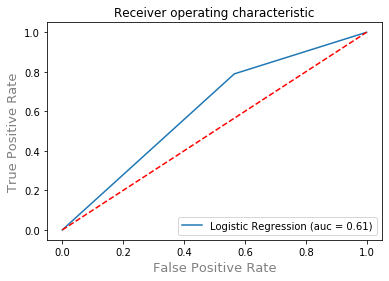

In [18]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

In [19]:
import numpy as np
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,  y_pred)

0.6121281464530892